<a href="https://colab.research.google.com/github/vvalcristina/datascience_codenation/blob/master/Semana_09_Codenation_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classificação**
Notebook criado com base nas aulas do AceleraDev DataScience e no notebook do Kazuki Yokoyama.


**Classificação** em aprendizagem de máquina é o processo de identificar características e rotular saídas das mesmas dentro de um contexto.


[Introdução a ML- Classificação](https://medium.com/drafter-ai/uma-introdu%C3%A7%C3%A3o-did%C3%A1tica-aos-algoritmos-de-classifica%C3%A7%C3%A3o-de-machine-learning-460be2d73395)


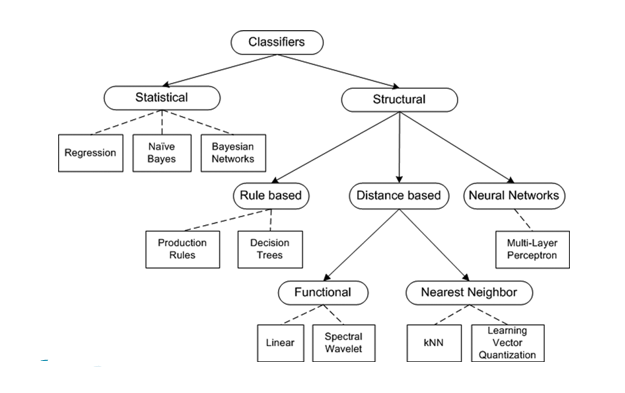

**Importando as libs necessárias**

In [1]:
#Import das libs
import functools
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_blobs, make_classification
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
# Algumas configurações para o matplotlib.
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 12)

In [0]:
np.random.seed(1000)

In [0]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Predict
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, #clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

**Matriz de confusão**


Matriz de confusão é uma medição de desempenho para o problema de classificação de aprendizado de máquina em que a saída pode ser de duas ou mais classes.

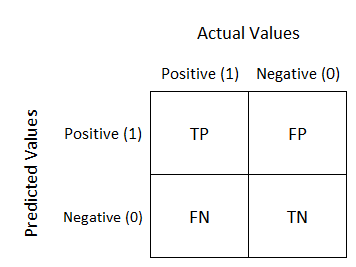


É extremamente útil para medir Recall, Precisão, Especificidade, Precisão e mais importante Curva AUC-ROC.

**Verdadeiro Positivo:**
você previu positivo e é verdadeiro.

**Verdadeiro Negativo:**
você previu negativo e é verdadeiro.

**Positivo falso: (erro tipo 1)**
você previu positivo e é falso.

**Falso Negativo: (Erro Tipo 2)**
você previu negativo e é falso.

**ROC**

A curva ROC (Receiver Operating Curve) é uma outra forma de avaliar o desempenho de classificadores.

A curva ROC mostra o quão bom o modelo criado pode distinguir entre duas coisas (já que é utilizado para classificação). 

Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precisão o binômio.


O ROC possui dois parâmetros:

* Taxa de verdadeiro positivo (True Positive Rate), que é dado por true positives / (true positives + false negatives)

* Taxa de falso positivo (False Positive Rate), que é dado por false positives / (false positives + true negatives)

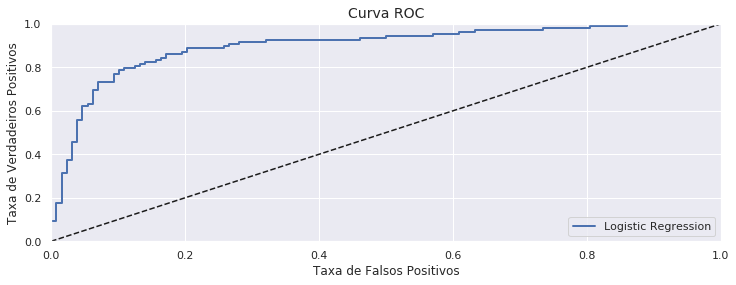


**Dados Desbalanceados**

Para realizarmos classificação com dados desbalanceados, devemos balanceá-los primeiro. As técnicas mais comuns para balanceamento de dados é através de reamostragem (resampling). Isso pode ser feito de duas formas básicas:

*Undersampling*: removemos dados da classe majoritária;

*Oversampling*: reamostramos dados da classe minoritária;

**SMOTE**

Utilizado em casos de *oversampling*.

Primeiro passo é encontrar os vizinhos próximos para as classes em minoria para cada amostra das classificações. Em seguida, traça uma reta entre o ponto original e o vizinho para definir a localização da observação da observação genérica.

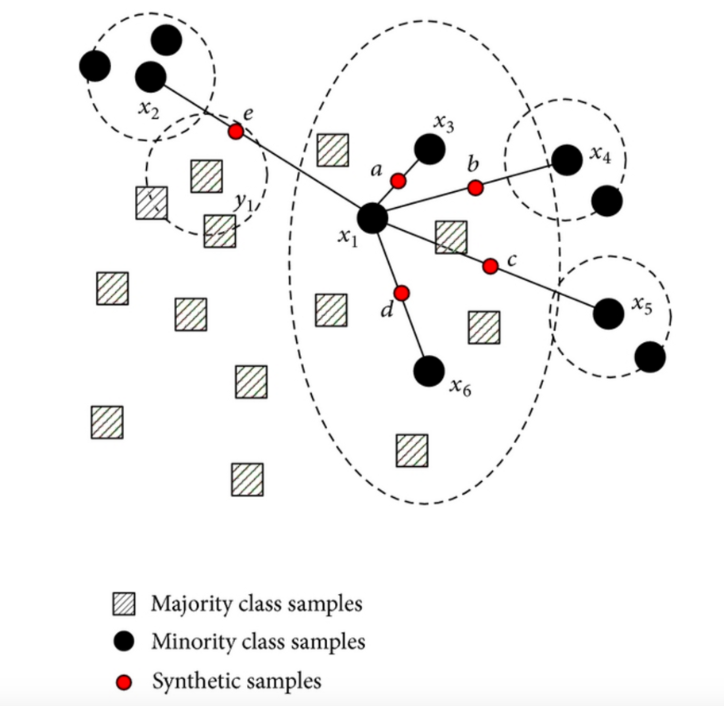



Referência: [Como lidar com dados desbalanceados em problemas de classificação](https://medium.com/data-hackers/como-lidar-com-dados-desbalanceados-em-problemas-de-classifica%C3%A7%C3%A3o-17c4d4357ef9)





Este algoritmo não está disponível por padrão no sklearn, mas pode ser encontrado nos seus projetos de contribuição na biblioteca imblearn.

[Imblearn](https://imbalanced-learn.readthedocs.io/en/stable/api.html)

In [0]:
X_data, y_data = make_classification(n_samples=1000,
                                     n_features=10,
                                     n_informative=10,n_redundant=0,
                                     n_repeated=0,
                                     weights=(0.1, 0.9),
                                     n_clusters_per_class=1,
                                     class_sep=3.0)

imbalanced = pd.DataFrame(np.c_[X_data, y_data], columns=["X" + str(i) for i in range(1, 11)] + ["target"])

imbalanced.target = imbalanced.target.astype(bool)

In [6]:
imbalanced.iloc[:5, :-1]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,2.264019,-5.879977,-0.262661,1.137353,-1.635105,-2.531767,5.789418,-0.951279,2.643438,-0.831458
1,1.829764,-5.209499,2.999197,2.290076,-3.010978,-4.402686,0.908426,-3.332957,3.722355,0.615578
2,1.350631,-5.069955,3.869841,2.523473,-4.199743,-6.161144,0.800673,-1.716646,5.273588,2.746047
3,0.897472,-4.894522,1.861834,3.581587,-2.396599,-6.604574,2.122387,-2.099819,1.930993,1.464681
4,2.399397,-1.858286,5.391069,3.715560,-4.269411,-4.255609,0.762214,-3.168513,6.155921,4.429450


Por construção, existem muito mais dados da classe positiva do que da classe negativa (uma proporção 9:1):



In [7]:
imbalanced.target.value_counts()

True     894
False    106
Name: target, dtype: int64

Para visualizar os dados, que estão em $\mathbb{R}^{10}$, utilizamos PCA e os transformamos para $\mathbb{R}^{2}$:

In [0]:
pca = PCA(n_components=2)

pca.fit(imbalanced.drop(["target"], axis=1))

imbalanced_pca = pca.transform(imbalanced.drop(["target"], axis=1))

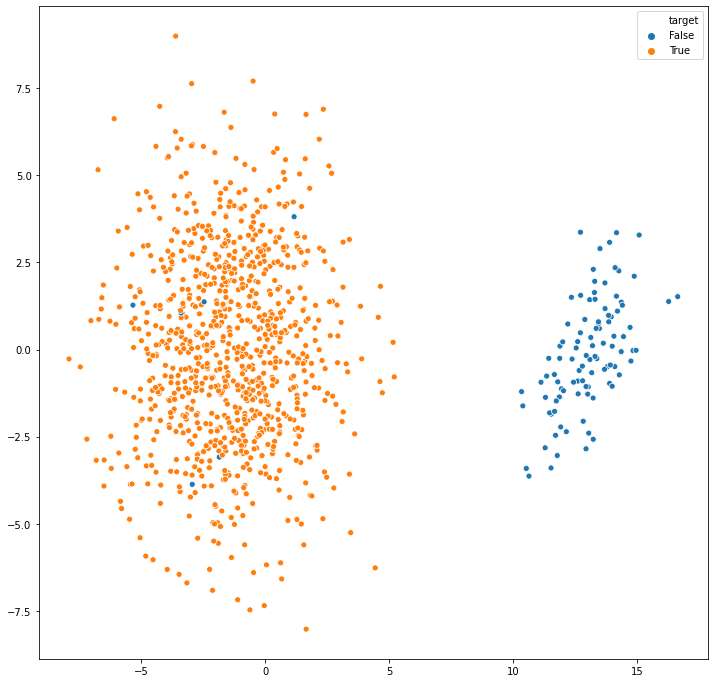

In [9]:
sns.scatterplot(imbalanced_pca[:, 0], imbalanced_pca[:, 1], hue=imbalanced.target);

Podemos ver claramente a maioria sendo da classe positiva (em laranja).

Utilizamos o SMOTE (do pacote imblearn) para reamostrar os dados da classe minoritária e assim balancear o nosso dataset

In [11]:
smote = SMOTE(ratio="minority")

X_smote, y_smote = smote.fit_resample(imbalanced.iloc[:, :-1], imbalanced.target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
imbalanced_pca_smote = pca.transform(X_smote)

Agora podemos ver que existem mais dados da classe negativa (em azul) do que no data set original:


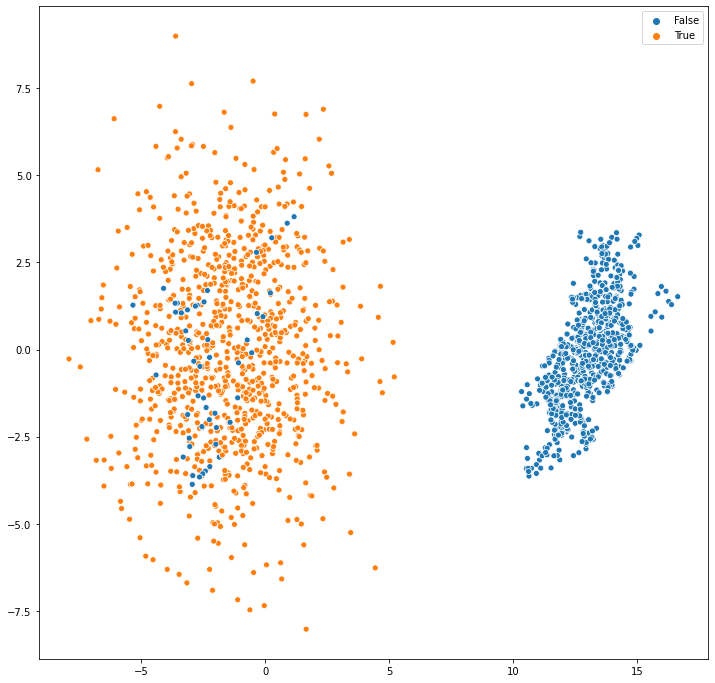

In [13]:
sns.scatterplot(x=imbalanced_pca_smote[:, 0], y=imbalanced_pca_smote[:, 1], hue=y_smote);

A quantidade de dados positivos e negativos se torna igual.

In [14]:
sum(y_smote == True)/sum(y_smote == False)

1.0

**Criando um *dataset* para classificação**

Vamos criar um *dataset* com 500 observações divididas em 3 classes:

In [0]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=2.0)

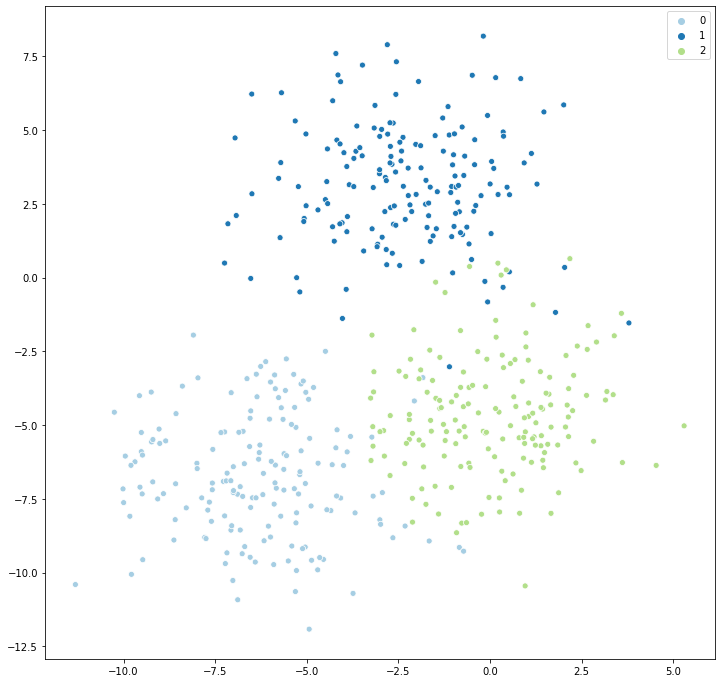

In [16]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Paired");

Para realizar o treinamento e teste dos modelos, vamos dividir o data set criado em treinamento e teste numa razão de 4:1:

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape

(400, 2)

**Regressão Logística**

É uma técnica recomendada para situações em que a
variável dependente é de natureza dicotômica ou
binária. 

Quanto às independentes, tanto podem ser
categóricas ou não.

A regressão logística é um recurso que nos permite estimar
a probabilidade associada à ocorrência de determinado
evento em face de um conjunto de variáveis explanatórias.

**Características**:
* Busca estimar a probabilidade da variável dependente assumir um determinado valor em função dos conhecidos de outras variáveis;
* Os resultados da análise ficam contidos no intervalo de zero a um.

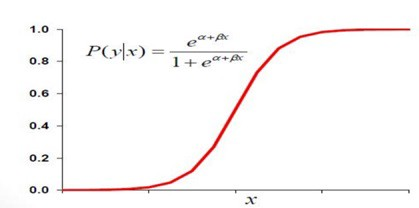

In [18]:
#Regressão Logistica
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

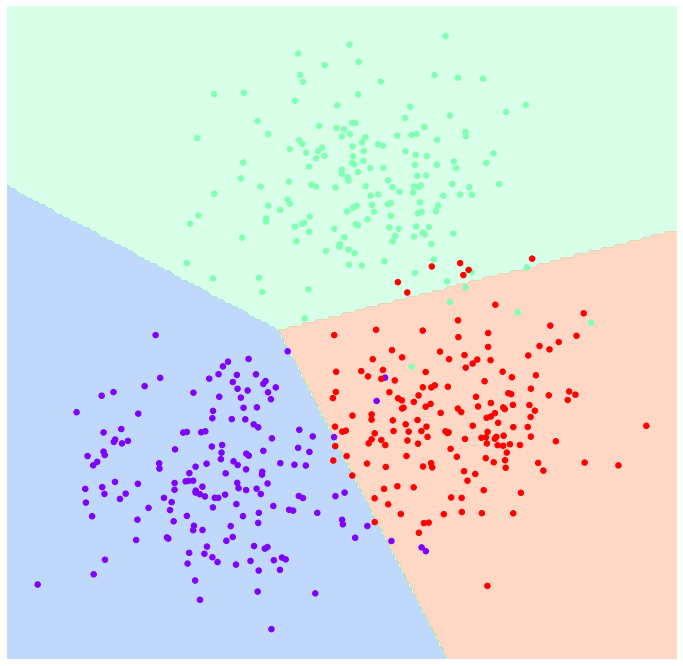

In [19]:
visualize_classifier(logistic, X, y)

A regressão logística nos retorna como resultados probabilidades, logo o método predict_proba() que nos retorne a probabilidade do dado de teste pertencer a cada uma das classes:

In [20]:
logistic.predict_proba([[-3, -2]])

array([[0.02623298, 0.23473261, 0.73903441]])

In [21]:
logistic.predict([[-3, -2]])

array([2])

A classe considerada como resposta é aquela que apresenta a **maior probabilidade**.



**kNN**

kNN do inglês *Knearest neighboors* é um algoritmo de classificação onde o objetivo é determinar o rótulo de classificação de uma amostra com base nas amostras vizinhas, que vem de um conjunto de treinamento.

Na figura temos um problema de classificação com dois rótulos de classe e com k=7.  São aferidas as distâncias de uma nova amostra, representada por uma estrela, às demais amostras de treinamento, representadas pelas bolinhas azuis e amarelas. A variável k representa a quatidade de vizinhos mais próximos que serão utilizados para averiguar de qual classe a nova amostra pertence. Com isso, das sete amostras de treinamento mais próximas da nova amostra, 4 são do rótulo A e 3 do rótulo B. Portanto, como existem mais vizinhos do rótulo 
A, a nova amostra receberá o mesmo rótulo deles, ou seja, A.

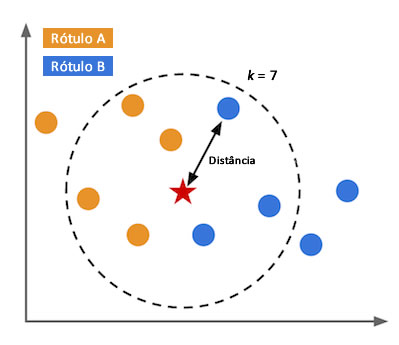

Dois pontos chaves que devem ser determinados para aplicação do KNN são: a métrica de distância e o valor de k.



In [22]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

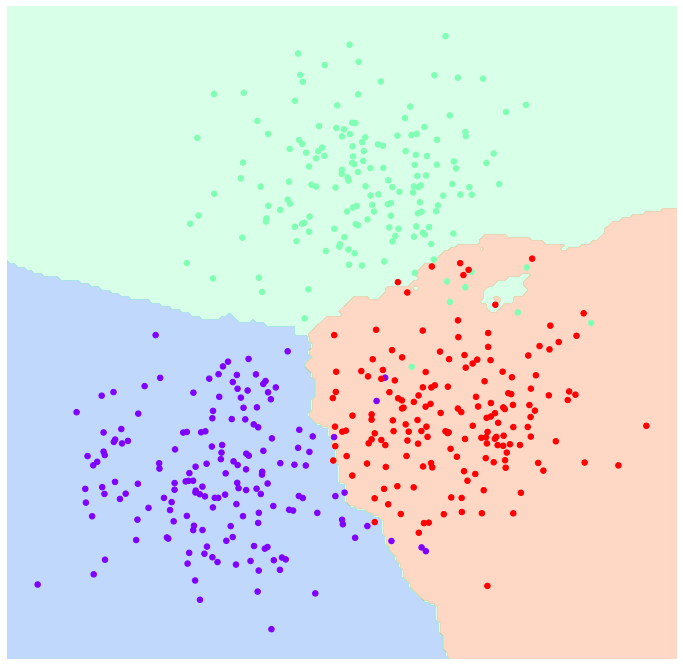

In [23]:
visualize_classifier(knn, X, y)

**Árvores de decisão**

Árvores de decisão são métodos de aprendizado de máquinas supervisionado não-paramétricos, muito utilizados em tarefas de classificação e regressão.

Referência:[Árvores de Decisão](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69)


In [0]:
decision_tree = DecisionTreeClassifier(max_depth=2)

decision_tree_fitted = decision_tree.fit(X_train, y_train)

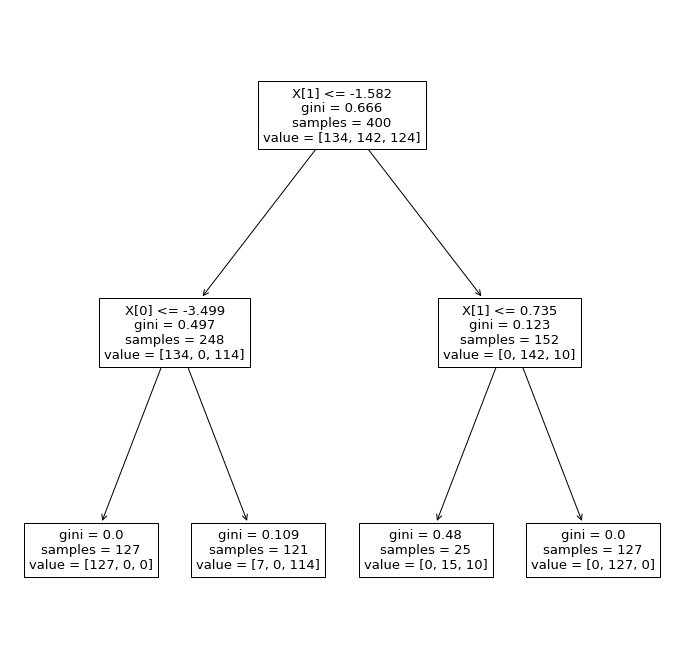

In [25]:
plot_tree(decision_tree_fitted);


Como podemos ver na árvore acima, a primeira folha tem índice de Gini igual a zero, o que significa que 100% dos dados que caíram nessa região durante o treinamento são todos da mesma classe. O mesmo acontece na última folha.

Abaixo verificamos as fronteiras de decisão da árvore criada:

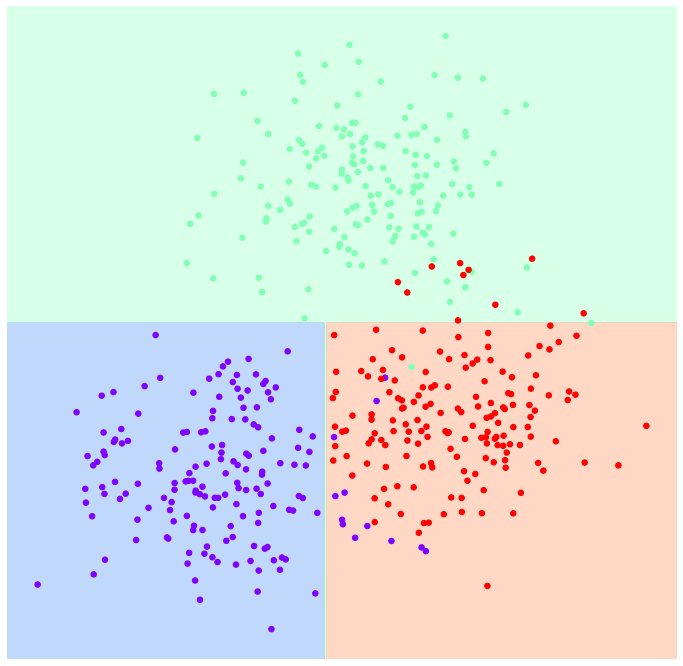

In [26]:
visualize_classifier(decision_tree, X, y);

Para prever em qual classe um dado de teste se encaixa, seguindo as regras da árvore de decisão, podemos utilizar o método predict(). Combinamos com o atributo classes_ para identificar a classe exata:

In [27]:
print(f"(-6, -6): {decision_tree.classes_[decision_tree.predict([[-6, -6]])]}")
print(f"(-0, -6): {decision_tree.classes_[decision_tree.predict([[0, -6]])]}")
print(f"( 4,  6): {decision_tree.classes_[decision_tree.predict([[4, 6]])]}")

(-6, -6): [0]
(-0, -6): [2]
( 4,  6): [1]


Também é possível encontrar a probabilidade estimada do dado de teste se encaixar em qualquer uma das classes através do método predict_proba():



In [28]:
decision_tree.predict_proba([[-4, -5]])

array([[1., 0., 0.]])

Árvores de decisão apresentam vantagens e desvantagens. Algumas vantagens:

São fáceis de interpretar.
Os dados não precisam ser pré-processados (normalização, padronização, nada disso).
São não paramétricas, ou seja, não dependem de nenhuma suposição em relação aos dados.
Porém, também apresentam algumas desvantagens:

Podem fazer overfitting dos dados com certa facilidade.
São muito suscetíveis a variações dos dados de treinamento.
Não funcionam bem com data sets desbalanceados.
Dividem as regiões sempre de forma ortogonal.

**Bagging**

Utilizar uma única árvore de decisão nem sempre leva a bons resultados. Árvores de decisão possuem uma alta variância e um baixo viés, o que pode levar a um alto erro total.

Para diminuir a variância, podemos utilizar bootstrapping. A técnica de bootstraping consiste em reamostrar o conjunto de treinamento com reposição e treinar um modelo para cada uma das reamostragens. Após o treinamento dos vários modelos, podemos classificar um dado de teste simplesmente usando votação majoritária: a classe prevista pela maioria dos modelos é escolhida como classe final.

Importante notar que bagging funciona com qualquer modelo de classificação. Mas é especialmente útil e popular com árvores de decisão.

Um exemplo de bagging com 300 árvores de decisão, onde em cada árvore são escolhidos 100 dados do conjunto de treinamento, é mostrado abaixo:

In [29]:
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


As fronteiras de decisão são agora muito menos rígidas que aquelas encontradas por uma única árvore de decisão

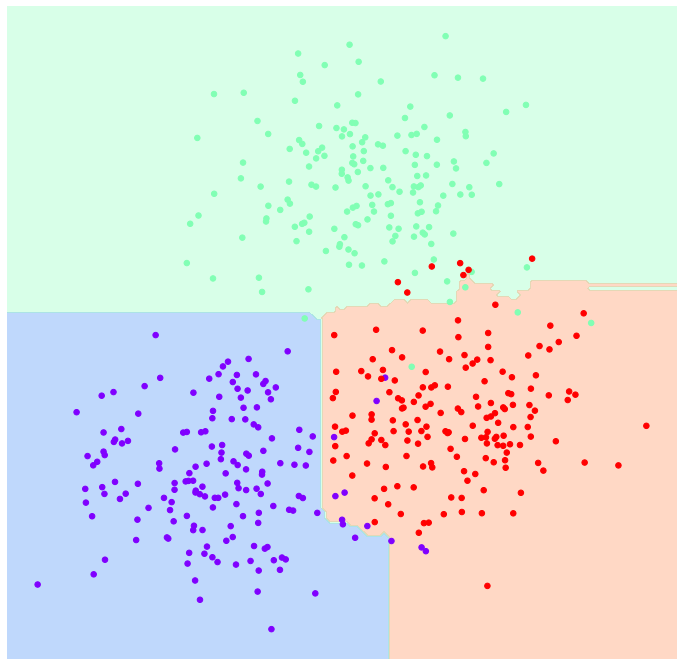

In [30]:
visualize_classifier(bagging, X, y);

Importante notar que ao fazermos bagging (ou qualquer tipo de ensemble), abrimos mão da interpretabilidade do modelo. Enquanto uma árvore de decisão é um modelo altamente interpretável, um monte de árvores agindo ao mesmo tempo não é interpretável. Esse é um tradeoff que temos que fazer entre interpretabilidada.

**Random Forest**

Apesar de bagging funcionar muito bem na maioria dos casos, podemos melhorá-lo ainda mais. A ideia das random forests é subdividir também as features usadas durante o treinamento das árvores de decisão.

A cada split da árvore de decisão, apenas um subconjunto das features é considerado. Isso ajuda a criar árvores mais variadas, ou seja, menos correlacionadas. Ao fazermos o ensemble dessas árvores, temos um erro total ainda menor

In [31]:
random_forest = RandomForestClassifier(n_estimators=500)

random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

As regiões obtidas com random forest são ainda mais flexíveis do que aquelas encontradas com bagging simples:


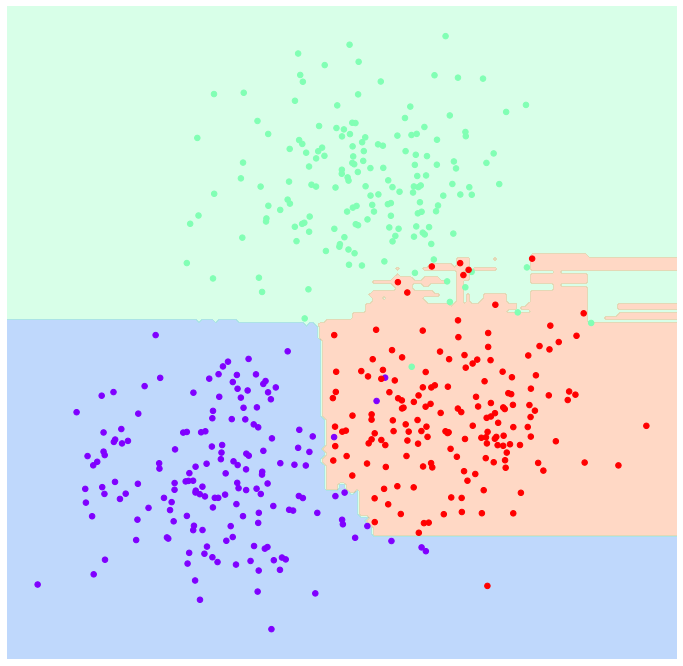

In [32]:
visualize_classifier(random_forest, X, y);